In [55]:
import pandas as pd
file1 = pd.read_csv('patient_info.csv')
file2 = pd.read_csv('tbi_incident.csv')
file1.head(5)

,patient_id,first_name,last_name,date_of_birth,gender,patient_type
0,161657dd-f33c-435c-81a6-2bd68754cabd,Michelle,Tobin-Forgrave,1973-03-05,female,tbiPatient
1,5c96ba1a-8b2d-49bc-8e8e-b07761948286,Robin,Lopez,1973-05-23,female,caregiver
2,7f0877be-4531-4c6d-a08e-de56720a8704,Sinda,Smith,1962-11-11,female,tbiPatient
3,d1b38236-e50d-4966-a9a0-9557caddc91f,Becky,Yorksie,1984-05-06,female,tbiPatient
4,eda39327-b38f-41de-a46a-8782787369b7,Justin,Macks,1991-07-10,male,caregiver


In [56]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Convert 'date_of_birth' column to datetime
file1['date_of_birth'] = pd.to_datetime(file1['date_of_birth'])

# Calculate the age based on the current date
current_date = datetime.now()
file1['age'] = file1['date_of_birth'].apply(lambda x: relativedelta(current_date, x).years)

# Print the modified DataFrame
print(file1)

                               patient_id first_name       last_name  \
0    161657dd-f33c-435c-81a6-2bd68754cabd   Michelle  Tobin-Forgrave   
1    5c96ba1a-8b2d-49bc-8e8e-b07761948286     Robin           Lopez    
2    7f0877be-4531-4c6d-a08e-de56720a8704      Sinda           Smith   
3    d1b38236-e50d-4966-a9a0-9557caddc91f      Becky         Yorksie   
4    eda39327-b38f-41de-a46a-8782787369b7     Justin           Macks   
..                                    ...        ...             ...   
957  00e179cd-5edb-47fe-be53-b1e96e905433       Neil        Langrick   
958  a92021a2-b0a0-4995-8f20-2412f93c4ffd      Kelly            Dale   
959  2ca293db-06a0-4e70-9895-54ce27eecd3b   Carissa       Brownotter   
960  b0dc61aa-3fc0-40e3-9c7d-770bf12955f1    Jazmyne         Taggart   
961  eaf0a3b8-d04f-41d4-9bd5-431fe53362eb     Joshua         Fontana   

    date_of_birth  gender               patient_type  age  
0      1973-03-05  female                 tbiPatient   50  
1      1973-05-

In [57]:
file2.head(5)

,id,tbi_incident_date,describe_event,injury_from,head_hit_location,patient_id,total_tbi,immediate_symptoms_resulting
0,212,1984-09-15,"i was beat up by a gang age 11, then beat up b...",Assault,"Front of Head,Left Side of Head,Top of Head,Ba...",91b48894-9b6d-46ff-b0fb-124270a72810,2,"Loss of Consciousness,Disorientation,Incoheren..."
1,236,2016-06-01,in my pool exercising after rehabilitation fro...,Subdural hemorrhage,Back of Head,3d3a8086-ccad-43de-83cb-ddba3591a8ab,2,"Loss of Consciousness,Memory Loss,Dazed or Vac..."
2,202,2018-09-21,i was in a mva. i was tboned on my driver side...,Collision,Back of Head,e73b4e3e-078b-4e54-9a7f-2893f3e96329,1,I was fine. but very emotional.
3,278,2020-02-16,my husband had an aneurysm which led to a mas...,Not known,Back of Head,edae5615-0b9e-46d5-aaa1-f34c00e838f2,2,"Loss of Consciousness,Disorientation,Confusion..."
4,73,2018-05-01,second stroke,Stroke,Back of Head,f2cbde39-82d5-40fa-a060-297e083eb187,2,"Disorientation,Confusion,Memory Loss,Incoheren..."


In [58]:
data = pd.merge(file1, file2, on='patient_id')
data.head()

,patient_id,first_name,last_name,date_of_birth,gender,patient_type,age,id,tbi_incident_date,describe_event,injury_from,head_hit_location,total_tbi,immediate_symptoms_resulting
0,161657dd-f33c-435c-81a6-2bd68754cabd,Michelle,Tobin-Forgrave,1973-03-05,female,tbiPatient,50,310,2017-10-01,i tripped backwards over my dog and hit my hea...,Fall,Right Side of Head,4,Confusion
1,5c96ba1a-8b2d-49bc-8e8e-b07761948286,Robin,Lopez,1973-05-23,female,caregiver,50,318,2019-11-13,my husband was stopped at a stoplight and was ...,Collision,"Front of Head,Neck,Back of Head,Top of Head,Le...",1,"Loss of Consciousness,Disorientation,Incoheren..."
2,7f0877be-4531-4c6d-a08e-de56720a8704,Sinda,Smith,1962-11-11,female,tbiPatient,60,316,2019-03-15,i was sitting in the bathroom having a severe ...,Fall,Front of Head,1,"Loss of Consciousness,Disorientation,Confusion..."
3,d1b38236-e50d-4966-a9a0-9557caddc91f,Becky,Yorksie,1984-05-06,female,tbiPatient,39,171,2018-08-03,motor vehicle accident,Accident,"Front of Head,Back of Head",1,"Disorientation,Confusion,Dazed or Vacant Stare..."
4,eda39327-b38f-41de-a46a-8782787369b7,Justin,Macks,1991-07-10,male,caregiver,31,319,2020-05-05,my 2 yr old son drowned,Accident,Drowned,1,50 percent brain damage


In [59]:
import os
import pandas as pd

# Assuming you already have a DataFrame called 'df'

# Specify the path and filename for the CSV file
csv_file_path = 'C:/Users/LENOVO/to/save/file.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)

# Convert the DataFrame to a CSV file
data.to_csv(csv_file_path, index=False)


In [60]:
data.shape

(813, 14)

In [61]:
data.isnull().sum()

patient_id                      0
first_name                      0
last_name                       0
date_of_birth                   0
gender                          0
patient_type                    0
age                             0
id                              0
tbi_incident_date               0
describe_event                  0
injury_from                     0
head_hit_location               0
total_tbi                       0
immediate_symptoms_resulting    0
dtype: int64

In [62]:
# Create a new column for age groups
data['age_group'] = ""

# Define the age group intervals manually
age_groups = [(0, 18), (19, 30), (31, 45), (46, 60), (61, float('inf'))]

# Assign each age value to an age group
for i, row in data.iterrows():
    age = row['age']
    for group in age_groups:
        if group[0] <= age <= group[1]:
            data.at[i, 'age_group'] = f"{group[0]}-{group[1]}"
            break
            
# View the resulting groups
print(data['age_group'].value_counts())

46-60     267
31-45     240
61-inf    146
19-30     145
0-18       15
Name: age_group, dtype: int64


In [63]:
data.head()

,patient_id,first_name,last_name,date_of_birth,gender,patient_type,age,id,tbi_incident_date,describe_event,injury_from,head_hit_location,total_tbi,immediate_symptoms_resulting,age_group
0,161657dd-f33c-435c-81a6-2bd68754cabd,Michelle,Tobin-Forgrave,1973-03-05,female,tbiPatient,50,310,2017-10-01,i tripped backwards over my dog and hit my hea...,Fall,Right Side of Head,4,Confusion,46-60
1,5c96ba1a-8b2d-49bc-8e8e-b07761948286,Robin,Lopez,1973-05-23,female,caregiver,50,318,2019-11-13,my husband was stopped at a stoplight and was ...,Collision,"Front of Head,Neck,Back of Head,Top of Head,Le...",1,"Loss of Consciousness,Disorientation,Incoheren...",46-60
2,7f0877be-4531-4c6d-a08e-de56720a8704,Sinda,Smith,1962-11-11,female,tbiPatient,60,316,2019-03-15,i was sitting in the bathroom having a severe ...,Fall,Front of Head,1,"Loss of Consciousness,Disorientation,Confusion...",46-60
3,d1b38236-e50d-4966-a9a0-9557caddc91f,Becky,Yorksie,1984-05-06,female,tbiPatient,39,171,2018-08-03,motor vehicle accident,Accident,"Front of Head,Back of Head",1,"Disorientation,Confusion,Dazed or Vacant Stare...",31-45
4,eda39327-b38f-41de-a46a-8782787369b7,Justin,Macks,1991-07-10,male,caregiver,31,319,2020-05-05,my 2 yr old son drowned,Accident,Drowned,1,50 percent brain damage,31-45


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Select the features and target variable
features = ['patient_type','head_hit_location','total_tbi','age_group']
target = 'gender'

X = data[features]  # Features
y = data[target]    # Target variable

# Perform one-hot encoding on the categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Print the encoded data
encoded_columns = encoder.get_feature_names_out(features)
encoded_data = pd.DataFrame(X_encoded.toarray(), columns=encoded_columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=60)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy:', accuracy*100)

# Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's performance
d_accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy:', dt_accuracy*100)

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
logistic_accuracy = accuracy_score(y_test, y_pred)
print('Logistic Model Accuracy:', logistic_accuracy*100)

Random Forest Accuracy: 74.84662576687117
Decision Tree Accuracy: 68.71165644171779
Logistic Model Accuracy: 67.48466257668711


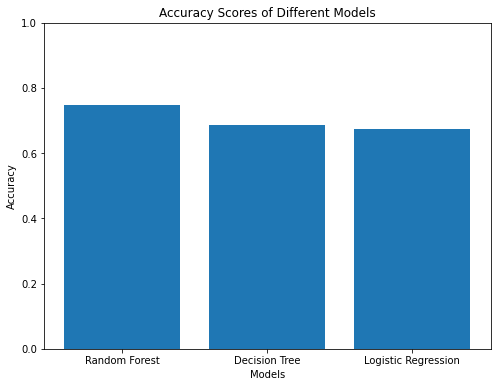

In [81]:
import matplotlib.pyplot as plt

# Accuracy scores of each model
accuracy_sc = [accuracy, dt_accuracy, logistic_accuracy]

# Model names
model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression']

# Plot size
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the accuracy scores
plt.bar(model_names, accuracy_sc)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.ylim([0.0, 1.0])  # Setting y-axis limits
plt.show()


In [82]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set with the Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)

# Generate the classification report
classification_report_rf = classification_report(y_test, y_pred_rf)
print('Random Forest Classification Report:')
print(classification_report_rf)

# Generate the confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Random Forest Confusion Matrix:')
print(confusion_matrix_rf)

# Make predictions on the test set with the Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test)

# Generate the classification report
classification_report_logistic = classification_report(y_test, y_pred_logistic)
print('Logistic Regression Classification Report:')
print(classification_report_logistic)

# Generate the confusion matrix
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix_logistic)

# Make predictions on the test set with the Decision Tree Classifier
y_pred_dt = dt_classifier.predict(X_test)

# Generate the classification report
classification_report_dt = classification_report(y_test, y_pred_dt)
print('Decision Tree Classification Report:')
print(classification_report_dt)

# Generate the confusion matrix
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print('Decision Tree Confusion Matrix:')
print(confusion_matrix_dt)

Random Forest Classification Report:
              precision    recall  f1-score   support

      female       0.75      0.97      0.85       113
        male       0.73      0.24      0.37        45
       other       1.00      0.20      0.33         5

    accuracy                           0.75       163
   macro avg       0.83      0.47      0.52       163
weighted avg       0.75      0.75      0.70       163

Random Forest Confusion Matrix:
[[110   3   0]
 [ 34  11   0]
 [  3   1   1]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

      female       0.71      0.91      0.80       113
        male       0.41      0.16      0.23        45
       other       0.00      0.00      0.00         5

    accuracy                           0.67       163
   macro avg       0.37      0.36      0.34       163
weighted avg       0.60      0.67      0.61       163

Logistic Regression Confusion Matrix:
[[103  10   0]
 [ 38   7   0]
 [  5   0   

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
